Welcome!  This notebook is a Data Science/Machine Learning Project



# Table of Contents

1. [Frame the problem and look at the big picture.](#frame)
2. [Get the data.](#collection)
3. [Explore the data to gain insights.](#eda)
4. [Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.](#prep)
5. [Explore many different models and short-list the best ones.](#models)
6. [Fine-tune your models and combine them into a great solution.](#tuning)
7. [Present your solution.](#solution)
8. [Launch, monitor, and maintain your system.](#system)

# Framing the Problem and Looking at the Big Picture
<a id="frame"></a>

The objective of this project is to build a model of median rental rates in California using city
data from Towncharts.com which provides information that is collated from a large variety of government agencies and public data sources.
<br>
Hypothetically, this model would be created to benefit and serve a particular purpose in a company.
Which in turn would determine the specifications and approach in your project

In this project my supervisor Adam Smith has told ME that MY model's output will be fed to another Machine Learning system along with many other signals. This downstream system will provide current property owners with insights towards determining their rental amount. Getting this right is critical, you want to ensure that the price is low enough to attract applicants, while high enough to cover costs. Pricing units lower may result in problematic tenants, but higher prices can lead to longer vacancies.

What are the current solutions/workarounds: Mr.Smith says that currently the estimates of median rental rates are outsourced. This is costly and their estimates are off by more than 200 dollars. 
That is why the company has chosen to investigate if an in house estimate based on publicly available data can come as close or improve upon the outsourced estimates.


My project is a typical supervised learning task given the fact that the
training examples are labeled (each instance comes with the expected output i.e, the cities median rental rate).
Moreover, I am asked to predict the value of $Y$ (median rental rate) using $X_{1}...X_{m}$ where **m** = *number of features*. This task is a a typical regression task in particualr a multiple regression problem. Additionally, seeing as there is no continous flow of data coming in the ML system, there is no need to adjust to changing data rapidly, and the data is small enough to fit in memory,so plain batch learning should do just fine.


I have chose the Root Mean Square Error(RMSE) to be the  performance measure of this ML system. This performance measure will be aligned with the business objective as it will give an idea of how much error the system typically makes in its predictions. Our minimum performance needed to reach the business objective would be a RMSE of less than or equal to 200
.$RMSE(X,h) = \sqrt{ \frac 1m \sum\limits_{i=1}^m ( h(x^i) - y ^i )^2 }$

In the case that the data has many outlier cities its recommeded to use the Mean Absolute Error as the performance measure
> $MAE(X,h) = \frac 1m \sum\limits_{i=1}^m \mid h(x^i) - y ^i\mid$

After framing the problem and looking at the big picture its good practice for me to  to list and verify the assumptions that were 
made so far (by me and others). This will help avoid a difference in expectations and help verify that the characteristics of my system output correspond to the expected signal that the downstream system expects. 

# Data Collection 
<a id="collection"></a>

Collection of data was gathered via webscraping from Towncharts.com the website provides information and data about every geographic location in the United States including city, county, zip code, state and more. Additional variables were merged from open sourced datasets (Appendix A) .Typically I would be asked and it would be good practice to import the csv file into a table in the companies internal database. This provides the opportunity for collaboration as all a coworker would need to access the data would be to get their credentials and access authorizations. 

For more information about how string methods, pandas, beautiful soup and more were used to produce the californai_housing.csv the following link outlines the process
> https://github.com/clazaro97chosen/American-Community-Survey-Project/blob/master/Scrape_the_Data.ipynb 

Checking the legal obligations from 
the user aggreement on Towncharts.com use of this data is allowed and encouraged.

**Download the Data**

Best practice calls for me to use a python file which i have created for fetching the data and writing a function to load the data.

### Setup

In [140]:

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(22)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
from heatmap import heatmap
from heatmap import corrplot

In [141]:
def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path,'datasets','california_housing.csv')
    return pd.read_csv(csv_path,index_col=0)   

In [142]:
housing = load_housing_data('C:\\Users\\Crist\\Towncharts_Project\\California_Housing_Project\\')


In [143]:
housing = housing.rename(columns = {'percent_of_rent_to_total':'rent_home_percent'})

# Exploring the Data
<a id="eda"></a>

### Data dictionary:  39 original variables collected 

* housing_units:Total number of housing units in the area
* housing_density : The number of housing units per square mile in the area
* change_hunits: Change in housing units from 2010 to 2017
* rent_home_percent: The percent of all occupied housing units that are rental housing units (%)
* owned_homes: The percent of all occupied housing units that are owned housing units (%)
* med_homeval: Median home value i.e how much property is worth( house and lot, mobile homes and lot, or condominium unit) if it was for sale \\$

* med_rental_rate: the median monthly rental amount for a rental unit in this area \\$

* med_owner_cost: The monthly cost of housing for property owners including mortgage payment, taxes, insurance,and utilities.\\$

* med_own_cost_aspercentof_income: The monthly owner cost as a percent of the household income. This measure is an excellent way to understand how affordable housing is for owners in an area (%)
* med_hval_aspercentof_medearn: How much the property is worth(house and lot, mobile home and lot, or condominium unit) if it was for sale as a percent of the median earnings for a worker in the area (%)
* med_hcost_ownmortg: Median housing cost for homeowners with a mortgage(including the cost of the mortgage or other debt) \\$
* med_hcost_own_wo_mortg: Median housing cost for homeowners who do not have a mortgage. This isolates the cost of ownership seperate from the financing cost of debt \\$
* hcost_aspercentof_hincome_ownmortg: Homeowners with a mortgage showing total cost (including mortgage debt) as a percent of household income (%)
* hcost_as_perc_of_hincome_womortg: Homeowners without a mortgage showing total cost as a percent of household income.
*med_real_estate_taxes: The median real estate taxes paid by owners of homes in the area \\$
* family_members_per_hunit: The average size of related families members who live together in a housing unit. 
* median_num_ofrooms: The average number of rooms of total rooms for housing units in the area
* median_year_house_built: The average year the housing units were built in the area. This indicates the average age of housing units in the area.
* household_size_of_howners: For people who own their homes how many people on average are living in them whether they are part of family or related or not. 
* household_size_for_renters: The average size of a household for people who are renting.
* med_year_moved_in_for_owners: The median year that a home owner moved into their home
* med_year_renter_moved_in: The median year that a renter moved into their home 
* The following varialbes are monthly rental rates by size of  Rental in Bedrooms as a percentage:
studio_1000_1499,studio_1500_more,
studio_750_999,
onebed_1000_1499,
onebed_1500_more,
onebed_750_999,
twobed_1000_1499,
twobed_1500_more,
twobed_750_999,
threebed_1000_1499,
threebed_1500_more,
threebed_750_999

* city: Name of city

* Latitude: Latitude of the city

* Longitude: Longitude of the city

* Population: Population of the city

Checking out the Dataframe

In [144]:
display(housing.head())
display(housing.info())

,housing_units,housing_density,change_hunits,rent_home_percent,owned_homes,med_homeval,med_rental_rate,med_owner_cost,med_own_cost_aspercentof_income,med_hval_aspercentof_medearn,...,twobed_1500_more,twobed_750_999,threebed_1000_1499,threebed_1500_more,threebed_750_999,city,Latitude,Longitude,population,area_total_km2
0,8751.00000,156.20000,-3.70000,50.70000,49.30000,151600.00000,1059.00000,1093.00000,24.00000,427.00000,...,0.03200,0.50800,0.58300,0.13700,0.18100,Adelanto,34.58277,-117.40921,32867.00000,145.10700
1,7674.00000,984.70000,1.20000,25.60000,74.40000,745000.00000,2261.00000,2488.00000,23.00000,928.00000,...,0.89900,0.03800,0.00000,0.96200,0.00000,AgouraHills,34.15334,-118.76167,20736.00000,20.26000
2,32414.00000,3104.10000,0.20000,53.00000,47.00000,729100.00000,1607.00000,2259.00000,21.00000,1006.00000,...,0.63300,0.01900,0.11900,0.66700,0.03600,Alameda,37.76521,-122.24164,78246.00000,59.46500
3,7724.00000,4319.40000,-2.10000,52.40000,47.60000,766000.00000,1739.00000,2501.00000,21.00000,991.00000,...,0.82100,0.01200,0.08400,0.84900,0.00000,Albany,37.88687,-122.29775,19682.00000,14.15500
4,30990.00000,4061.10000,0.20000,59.70000,40.30000,553800.00000,1286.00000,1629.00000,22.00000,1296.00000,...,0.31200,0.05400,0.18000,0.62900,0.03900,Alhambra,34.09529,-118.12701,85168.00000,19.76600


<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 451
Data columns (total 39 columns):
housing_units                         452 non-null float64
housing_density                       452 non-null float64
change_hunits                         450 non-null float64
rent_home_percent                     452 non-null float64
owned_homes                           452 non-null float64
med_homeval                           452 non-null float64
med_rental_rate                       451 non-null float64
med_owner_cost                        449 non-null float64
med_own_cost_aspercentof_income       452 non-null float64
med_hval_aspercentof_medearn          452 non-null float64
med_hcost_ownmortg                    451 non-null float64
med_hcost_own_wo_mortg                450 non-null float64
hcost_aspercentof_hincome_ownmortg    451 non-null float64
hcost_as_perc_of_hincome_womortg      452 non-null float64
med_real_estate_taxes                 452 non-null float64
family_mem

None

In [145]:
count = 0
for col in housing.columns:
    if housing[col].isna().sum() >0 :
        print(housing[col].name,"has a count of missing values =",housing[col].isna().sum())
    

change_hunits has a count of missing values = 2
med_rental_rate has a count of missing values = 1
med_owner_cost has a count of missing values = 3
med_hcost_ownmortg has a count of missing values = 1
med_hcost_own_wo_mortg has a count of missing values = 2
hcost_aspercentof_hincome_ownmortg has a count of missing values = 1
med_year_renter_moved_in has a count of missing values = 18
studio_1000_1499 has a count of missing values = 6
studio_1500_more has a count of missing values = 10
studio_750_999 has a count of missing values = 11
onebed_1000_1499 has a count of missing values = 6
onebed_1500_more has a count of missing values = 10
onebed_750_999 has a count of missing values = 11
twobed_1000_1499 has a count of missing values = 6
twobed_1500_more has a count of missing values = 10
twobed_750_999 has a count of missing values = 11
threebed_1000_1499 has a count of missing values = 6
threebed_1500_more has a count of missing values = 10
threebed_750_999 has a count of missing values =

Each row represents a city in california we have a total collection of 452 cities/instances in the dataset. **Some attributes contain null values**.  In our case this means the variable was not in the text section of the housing information provided by Towncharts.com or had missing values from the datasets that were merged. Although the data set is fairly small by Machine Learning standards this data set is great as a first step in predicting median rental rates in california.I will need to decide which method to use to treat these missing values later.

It is important to note that all attributes are numerical. No dummy variables need to be created for an ordinal character variable. If there was a categorical attribute with a large number of possible categories it is recommended to avoid the computational complexity by replacing each category with a learnable low dimensional vector  called an embedding. For future research perhaps some character variables should be considered after seeking domain expertise about valuable character variables to consider in the prediction of median rental price. 

In [146]:
pd.options.display.float_format = '{:.5f}'.format
#pd.reset_option('^display.', silent=True)

Summary of each numerical attribute

In [148]:
housing.describe()

,housing_units,housing_density,change_hunits,rent_home_percent,owned_homes,med_homeval,med_rental_rate,med_owner_cost,med_own_cost_aspercentof_income,med_hval_aspercentof_medearn,...,twobed_1000_1499,twobed_1500_more,twobed_750_999,threebed_1000_1499,threebed_1500_more,threebed_750_999,Latitude,Longitude,population,area_total_km2
count,452.00000,452.00000,450.00000,452.00000,452.00000,452.00000,451.00000,449.00000,452.00000,452.00000,...,446.00000,442.00000,441.00000,446.00000,442.00000,441.00000,452.00000,452.00000,452.00000,444.00000
mean,24963.13274,1580.13518,2.94800,42.98119,57.01881,491502.22566,1383.59645,1708.65702,22.19027,861.29867,...,0.30597,0.34552,0.18066,0.23041,0.56978,0.08724,35.99705,-119.72680,74162.43584,48.29639
std,79012.58597,1238.87668,5.90521,13.60165,13.60165,378745.53673,485.59675,659.87260,2.68098,473.54670,...,0.20365,0.31083,0.17337,0.17530,0.28140,0.11300,2.32023,2.15397,217920.49976,94.11204
min,37.00000,6.50000,-19.00000,3.60000,10.70000,56100.00000,508.00000,358.00000,12.00000,122.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,32.64005,-124.26394,76.00000,0.81300
25%,4385.75000,863.85000,-0.87500,34.30000,47.77500,237625.00000,1001.50000,1189.00000,21.00000,561.50000,...,0.12925,0.04700,0.03300,0.08500,0.36825,0.01800,33.94604,-121.88718,12421.00000,9.77225
50%,11841.00000,1259.15000,2.10000,43.30000,56.70000,389750.00000,1314.00000,1627.00000,22.00000,837.00000,...,0.28050,0.26650,0.10600,0.18650,0.66700,0.04700,35.43135,-119.42568,33844.50000,24.34750
75%,26010.25000,1983.20000,5.60000,52.22500,65.70000,622075.00000,1675.00000,2085.00000,23.00000,1078.25000,...,0.47475,0.63075,0.32000,0.35675,0.80675,0.10900,37.83826,-117.93992,76892.00000,53.53300
max,1457762.00000,13166.80000,37.90000,89.30000,96.40000,2000001.00000,3501.00000,4001.00000,50.00000,7619.00000,...,1.00000,1.00000,0.77400,0.77900,1.00000,0.92800,41.96737,-114.58917,3949780.00000,1302.00000


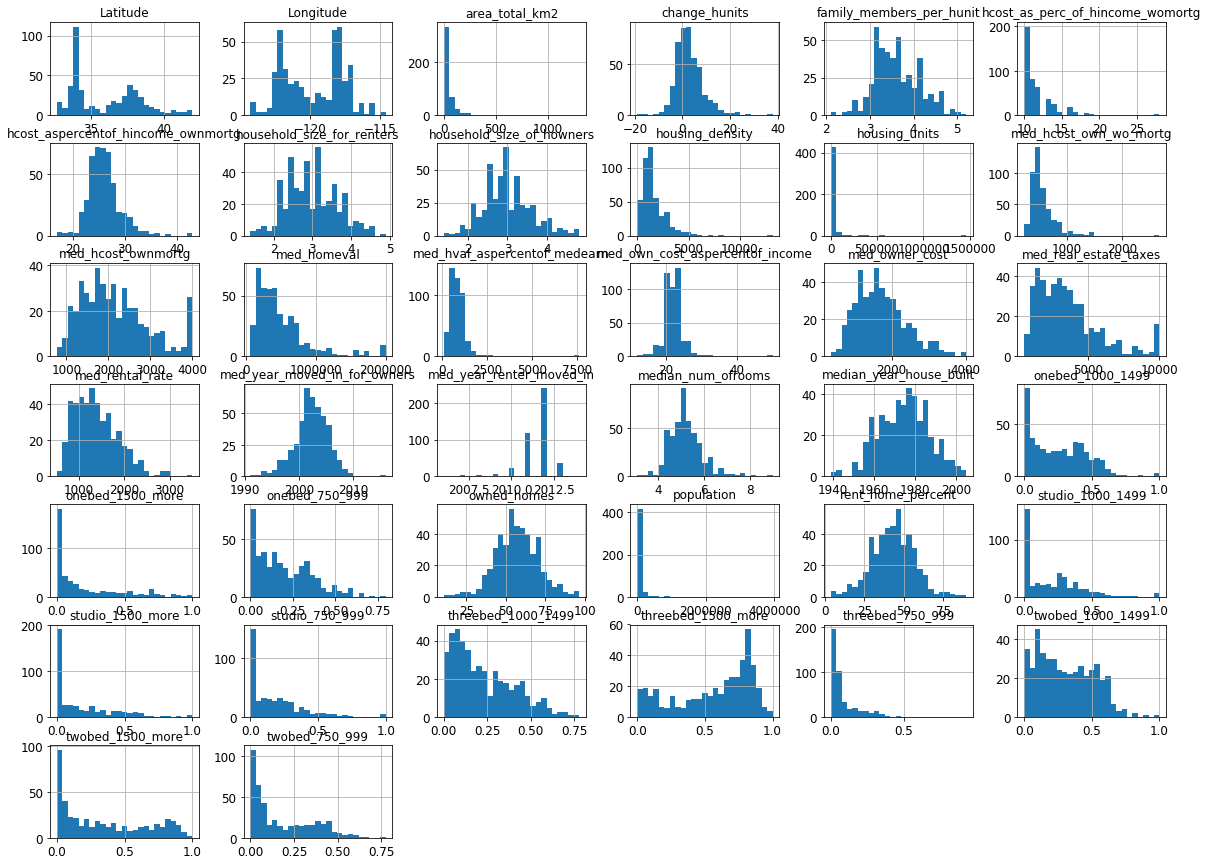

In [149]:
housing.hist(bins=25,figsize=(20,15))
plt.show()

 ### A few takeaways:
* **Attributes have different scales** some are in percentage, some are in units, and some are in dollars.
<br><br>
* **Many histograms are right tail heavy**: Meaning their mean is greater than their median i.e the mean is being 'pulled' by outliers.
<br><br>
* Interestingly  housing units (mean: 24963, std:79012, median:11841) and  change in housing units from 2010 to 2017 (mean:3, std 5.9, median:2.1) are two attributes whose standard deviation are considerably greater than their mean looking at the IQR for both the range of the middle half in change of housing units is Q3(5.6) to Q1(-.875%) = 6.475 and the range of the middle half of housing units is Q3(26010.25) to Q1(4385.75) = 21624.5
<br><br>
* Two attributes median housing cost for homeowners with a  mortgage (including the cost of the mortgage or other debt) and median real estate taxes paid by onwers of homes in the area have a noticable number of high values at the tail end (spike) of their distribution of values. <br><br>
* The mean percent of all occupied housing units that are owned housing units across the cities is greater than the mean of all occupied housing units that are rental housing units mean of 57% vs mean of 42% both have a fairly normal distribution <br><br>
* A variable that provides insight how much the property is worth(house and lot, mobile home and lot, or condominium unit) if it was for sale as a percent of the median earnings for a worker in the area this attribute has a mean of 861 standard deviation of 473, and a median of 837. It is a slightly right skewed distribution.

### Creating a test set

Best practice advises me to create a unique test set and avoid generating a different test as over time the Machine Learning algorithms will get to see the whole dataset. There are some important considerations when creating a test set. And they depend on whether I will be fetching an updated dataset on occassion or if I would be working on just one dataset. The latter has a simple solution of setting the random number generator seed in ***train_test_split()***, so that it always generates the same shuffled indices for extracting the instances to include in my test set. While the former involves using each instance's identifier to decide whether or not it should go in the test set (assuming instances have a unique and immutable identifer). This eliminates the possibility of leakage of instances previously in the training set into the new test set. However stratisfied sampling might be preffered over random sampling in the occasion that you want to ensure that the test set is representative of some attribute in your data set.

I choose to implement stratisfied random sampling
based on med_owner_cost (the median monthly cost of housing for property owners). A continous numerical attribute created into a category. My belief is that this is a vital attribute in predicting median rental prices. For example, if my test set contained a grand majority of instances in which med_owner_cost was between the 3rd Quantile and the max of med_owner_cost, than no matter what machine learning pipeline I implemented my test error would always be large. 

Note that one instance had a missing a label value this value will be deleted. And med_owner_cost has three missing values which will be excluded sadly.
Further treatment of missing values will be dealt with shortly.

In [150]:
housing = housing[(pd.notnull(housing['med_rental_rate'])) & (pd.notnull(housing['med_owner_cost']))]
housing = housing.reset_index(drop=True)

Creation of owner cost category

In [152]:
housing['owner_cost_cat'] = pd.cut(housing['med_owner_cost'],
                                  bins = [0,750,1500,2250,3000,np.inf],
                                  labels = [1,2,3,4,5])

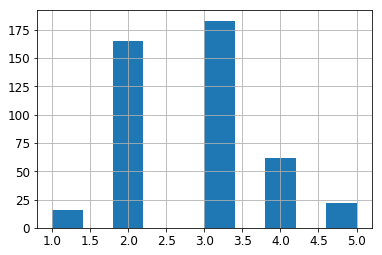

In [153]:
housing['owner_cost_cat'].hist()

Stratified sampling based on owner cost category

In [154]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=22)
for train_index,test_index in split.split(housing,housing['owner_cost_cat']):
    strat_train_set  = housing.reindex(train_index)
    strat_test_set = housing.reindex(test_index)

In [155]:
print("Owner cost category proportions in the overall dataset:\n{}".format(housing['owner_cost_cat'].value_counts()/len(housing)))           
print("Owner cost category proportions in the test set:\n{}".format(strat_test_set['owner_cost_cat'].value_counts()/ len(strat_test_set)))

Owner cost category proportions in the overall dataset:
3   0.40848
2   0.36830
4   0.13839
5   0.04911
1   0.03571
Name: owner_cost_cat, dtype: float64
Owner cost category proportions in the test set:
3   0.41111
2   0.36667
4   0.14444
5   0.04444
1   0.03333
Name: owner_cost_cat, dtype: float64


In [156]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("owner_cost_cat", axis=1, inplace=True)

### Visualizing the data

In [158]:
housing = strat_train_set.copy()

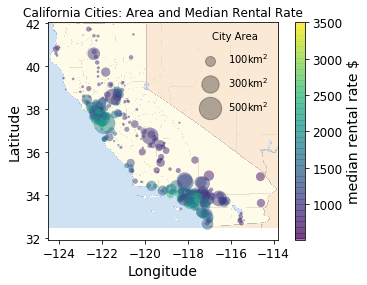

In [159]:
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.scatter(housing['Longitude'],housing['Latitude'],label=None,
           c = housing['med_rental_rate'],cmap='viridis',
           s=housing['area_total_km2'],linewidth=0,alpha=0.5)

plt.axis(aspect='equal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label= "median rental rate $")
plt.clim(508,3501)

for area in [100,300,500]:
    plt.scatter([],[],c='k',alpha=0.3,s=area,
               label = str(area) + 'km$^2$')
plt.legend(scatterpoints = 1,frameon = False,labelspacing =1,title = 'City Area')

plt.title('California Cities: Area and Median Rental Rate')
plt.show()




**Which features are strongly correlated with the target variable?**

In [161]:
corr_matrix = housing.corr()
corr_target = corr_matrix['med_rental_rate'].sort_values(ascending = False)
corr_target

med_rental_rate                       1.00000
med_hcost_ownmortg                    0.88786
med_owner_cost                        0.85964
twobed_1500_more                      0.85857
med_real_estate_taxes                 0.83915
onebed_1500_more                      0.82046
med_homeval                           0.80136
threebed_1500_more                    0.79856
med_hcost_own_wo_mortg                0.61331
studio_1500_more                      0.53605
median_num_ofrooms                    0.46772
owned_homes                           0.44855
studio_1000_1499                      0.38692
med_hval_aspercentof_medearn          0.38077
onebed_1000_1499                      0.38017
housing_density                       0.21685
housing_units                         0.14622
med_year_renter_moved_in              0.14237
population                            0.12210
area_total_km2                        0.07201
med_own_cost_aspercentof_income       0.02325
Longitude                         

This is great information! There are several attributes that are highly correlated with the median rental rates. For example median rental rate tends to increase when the variables:
> med_hcost_ownmortg,med_owner_cost twobed_1500_more,med_real_estate_taxes,onebed_1500_more        med_homeval etc. increase. 

On the other hand the median rental rate tends to decrease when the variables:
> threebed_750_999,twobed_750_999,threebed_1000_1499 etc. increase.

Finally lets note that the variables: 
> area_total_km2, med_own_cost_aspercentof_income, Longitude, change_hunits,hcost_aspercentof_hincome_ownmortg and a other variables are very weakly associated with median rental rate.  

Below we take a a deeper look at a few strongly correlated attributes.

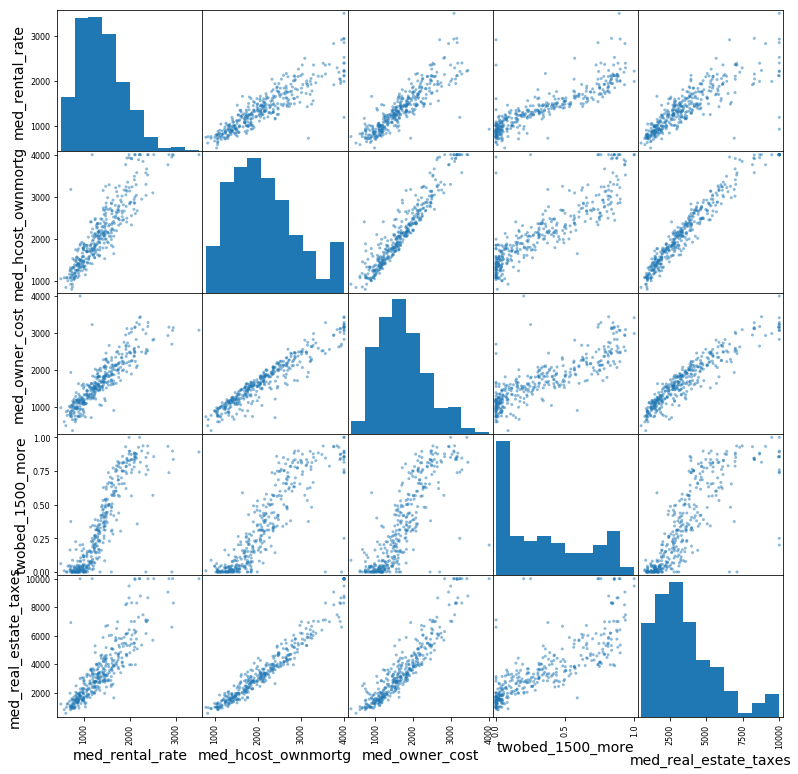

In [162]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[corr_target.index[[0,1,2,3,4]] ] ,figsize = (13,13))
plt.show()

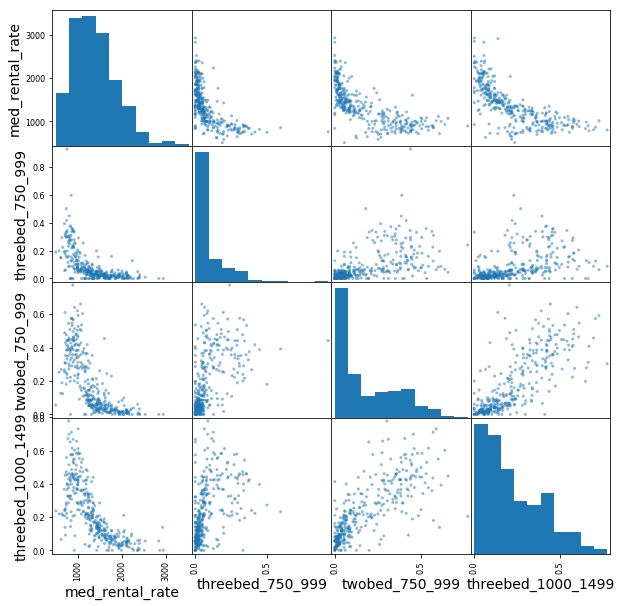

In [163]:
scatter_matrix(housing[corr_target.index[[0,35,36,37]] ] ,figsize = (10,10))
plt.show()

**Are there interesting or unexpected strong correlations between other features?** Heatmaps are a great way to accomplish this investigation.This will help when deciding to use regularization. Bacause between elastic net/ridge/lasso we know lasso does not handle multicollinearity very well. Additionally, this information may add some insight into feature engineering.

Note the size of each square corresponds to the magnitude of the correlation it represents in the following heatmap

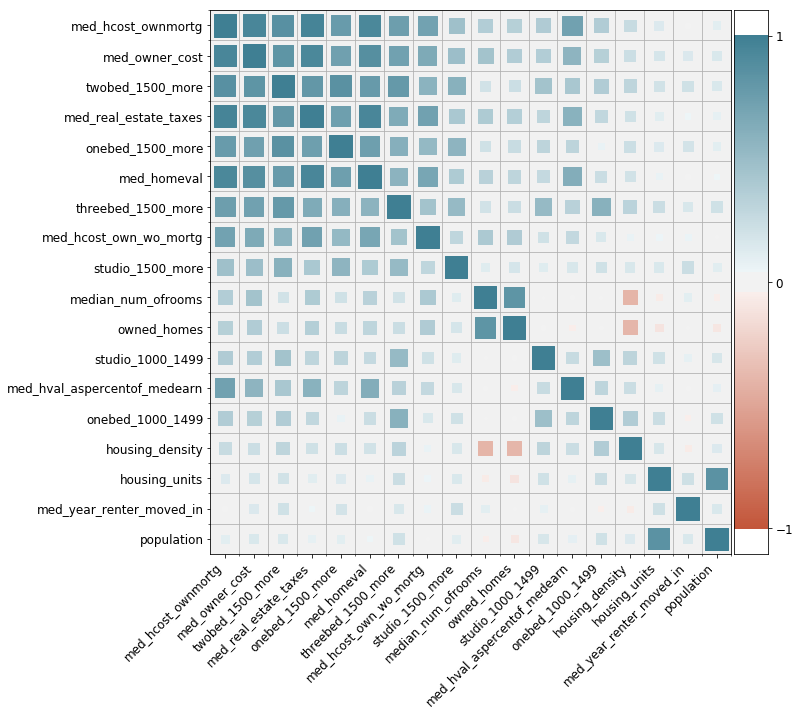

In [164]:
heat_one = corr_target.index[1:19]
heat_one
heat_one_fig = housing.loc[:,heat_one].copy()
plt.figure(figsize = (10,10))
corrplot(heat_one_fig.corr())

In [165]:
corr_target.index[1:7]

Index(['med_hcost_ownmortg', 'med_owner_cost', 'twobed_1500_more',
       'med_real_estate_taxes', 'onebed_1500_more', 'med_homeval'],
      dtype='object')

The heatmap demonstrates that 'med_hcost_ownmortg','med_hval_aspercentof_medearn','med_owner_cost', 'twobed_1500_more',
       'med_real_estate_taxes', 'onebed_1500_more', 'med_homeval', 'population', 'hunits' have some multicolinearity between them

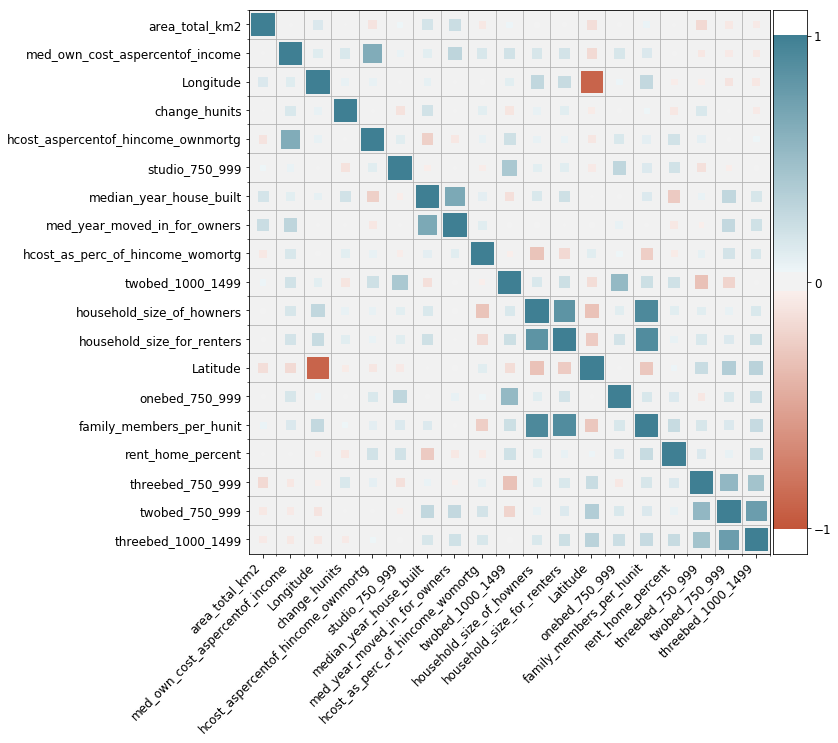

In [166]:
heat_two = corr_target.index[19:38]
heat_two
heat_two_fig = housing.loc[:,heat_two].copy()
plt.figure(figsize = (10,10))
corrplot(heat_two_fig.corr())

The heat map above demonstrates some intuitive correlation between variables. For example, its quite expected to have family members per housing unit to be correlated with household size of housing owners and household size for renters this extends to the other variables that are exhibiting correlation between each other.

# Preparing and Cleaning the Data for Machine Learning Algorithms

In [477]:
housing = strat_train_set.drop('med_rental_rate',axis =1)
housing_labels = strat_train_set['med_rental_rate'].copy()
#
housing = housing.drop(['city','Latitude','Longitude','change_hunits'],axis=1)

Better data will beat fancier algorithms. If i have a properly cleaned dataset, even simple algorithms can learn some valuable insights from the data.

The first recommended step in data cleaning is to **remove unwanted observations these include duplicate or irrelevant observations**.In our case during data collection preliminary steps were taken to avoid unwanted observations

Next up would be checking the data set for **structural errors**.
These may include inconsistencies in attribute units,typos,
mislabeled classes etc.This very 'sexy' necessary part of data cleaning  was already performed. For more details check out [data collection](https://github.com/clazaro97chosen/California_Housing_Project/blob/master/Scrape_the_Data.ipynb)

this operation assumes values are positive and non-zero. It is common to transform observations by adding a fixed constant to ensure all input values meet this requirement.

In [332]:
percentcolumns = np.array(housing.columns[20:32])
percentcolumns

array(['studio_1000_1499', 'studio_1500_more', 'studio_750_999',
       'onebed_1000_1499', 'onebed_1500_more', 'onebed_750_999',
       'twobed_1000_1499', 'twobed_1500_more', 'twobed_750_999',
       'threebed_1000_1499', 'threebed_1500_more', 'threebed_750_999'],
      dtype=object)

In [ ]:
for acol  in percentcolumns:
    housing[acol] = (housing[acol] *100)

## scratchwork

In [475]:
practice = housing.copy()

In [476]:
practice.shape

(358, 34)

In [299]:
for acol  in percentcolumns:
    practice[acol] = (practice[acol] *100)

In [301]:
imp = IterativeImputer(max_iter=10,random_state=22,min_value = 0)
imp.fit(practice)
practice_dat= imp.transform(practice)
practice_df= pd.DataFrame(practice_dat,columns=practice.columns )

In [313]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=22)
X_trans = qt.fit_transform(practice_df)

C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (358). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [342]:
housing_scaled = pd.DataFrame(X_trans,columns = practice_df.columns)
housing_scaled

,housing_units,housing_density,rent_home_percent,owned_homes,med_homeval,med_owner_cost,med_own_cost_aspercentof_income,med_hval_aspercentof_medearn,med_hcost_ownmortg,med_hcost_own_wo_mortg,...,onebed_1500_more,onebed_750_999,twobed_1000_1499,twobed_1500_more,twobed_750_999,threebed_1000_1499,threebed_1500_more,threebed_750_999,population,area_total_km2
0,0.58251,-0.86588,-1.09274,1.09274,-0.06675,0.08436,0.49323,-0.26278,-0.03160,1.29281,...,-5.19934,-0.01755,0.13735,-0.23743,0.24104,0.38494,-0.18715,-0.05620,0.13735,1.17275
1,-0.34740,0.65044,-0.10905,0.10552,1.51865,0.85571,-0.07731,1.60160,1.24567,1.64079,...,1.36051,-1.17275,-1.18683,1.91086,-1.09914,-1.43509,0.69893,-0.69446,-0.58251,-0.68555
2,0.21582,-0.99584,-1.54128,1.54128,0.38494,-0.18715,1.00744,-0.32141,0.50118,1.86899,...,0.25552,0.53328,0.49323,0.18358,-0.07379,-1.54128,0.09140,0.57421,-0.37739,0.86588
3,-0.58251,0.24466,1.86899,-1.86899,-1.23056,-0.69446,-0.61188,-1.36051,-0.89695,-1.06138,...,-5.19934,-0.52118,-0.23382,-0.49323,1.83015,2.00636,-1.39683,0.57421,-0.67670,-0.69446
4,0.95074,-0.13735,-0.18358,0.18358,-0.16576,0.35113,-0.07731,-0.42304,0.07731,0.22661,...,0.24466,0.18001,0.47743,0.08788,0.15154,-0.43844,0.64179,-0.45396,0.96183,0.98438
5,0.41537,0.01404,-0.88650,0.88650,0.03160,0.36235,1.00744,-0.23021,0.23382,0.41537,...,0.06675,0.32511,0.58251,0.37739,-0.18001,-0.40011,0.91281,-0.97304,0.37739,0.43844
6,-0.64179,-0.95074,-1.45504,1.45504,-0.51716,-1.00744,-0.07731,-0.94524,-0.57421,-0.47743,...,-5.19934,1.83015,1.10558,-0.09493,0.15154,1.06757,-0.44619,-5.19934,-0.90749,-0.20863
7,0.59923,5.19934,2.53626,-2.53626,0.82572,0.95074,1.00744,0.67670,0.91814,1.44499,...,0.98438,-0.92890,-0.17288,0.72152,-0.24466,0.11258,-0.06675,-0.40392,0.05972,-1.27678
8,1.64079,1.21573,0.17288,-0.17288,0.84563,0.61612,-0.61188,0.54140,0.79645,0.33995,...,0.49323,-0.32881,-0.20505,0.85571,-0.88131,-0.52521,0.65479,-0.97304,1.36051,0.65914
9,-0.01053,1.64079,0.71244,-0.71244,-0.24466,-0.28831,0.49323,0.18001,-0.12318,0.31034,...,-0.10905,-0.09846,1.35170,0.05268,-1.34300,0.33252,0.00000,-5.19934,0.10905,-0.78685


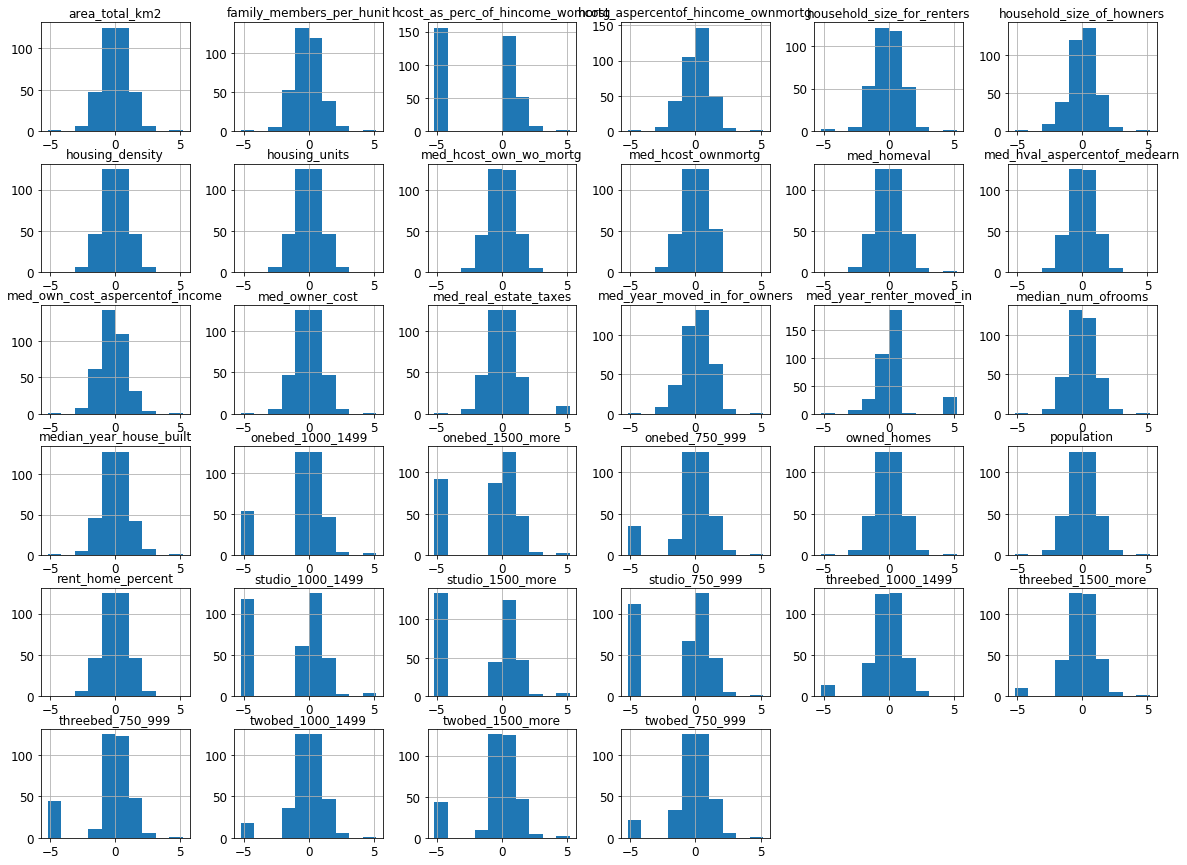

In [343]:
housing_scaled.hist(figsize=(20,15))
plt.show()

## scratch work done

We continue with **handling missing data**. Dealing with missing values in my opinion is nuanced as it depends on why the data is missing and it also comes down to the nature of the data. [Sunil Ray](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#three) outlines some reasons for why instances have missing values and common methods to treat missing values. They are:
1. Data Extraction
2. Data Collection
a) Missing completely at random
b) Missing at random
c) Missing that depends on unobserved predictors
d) Missing that depends on the missing value itself

While methods to treat missing values include:
1. Deletion (list wise, pairwise)
2. Mean/Mode /Median Imputation
3. Prediction Model
4. KNN Imputation
 
However, it can be noted that perhaps imputing missing values is sub-optimal as it lead to a loss in information as the value was originally missing. Telling your algorithm that a value was missing is informative in itself.For numeric data you flag the observation using an indicator variable and fill the missing values with 0. There is also the application of [collaborative filtering](https://datascience.stackexchange.com/questions/9425/handling-many-missing-values).

Afterwards we apply **Feature Scaling** scikit learn has some
great documentation on [Comparing the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) [Shay Geller](https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf) also wrote an excellent article.


In [130]:
count = 0
for col in housing.columns:
    if housing[col].isna().sum() >0 :
        print(housing[col].name,"has a count of missing values =",housing[col].isna().sum())
    

med_hcost_ownmortg has a count of missing values = 1
med_hcost_own_wo_mortg has a count of missing values = 1
hcost_aspercentof_hincome_ownmortg has a count of missing values = 1
med_year_renter_moved_in has a count of missing values = 15
studio_1000_1499 has a count of missing values = 5
studio_1500_more has a count of missing values = 7
studio_750_999 has a count of missing values = 10
onebed_1000_1499 has a count of missing values = 5
onebed_1500_more has a count of missing values = 7
onebed_750_999 has a count of missing values = 10
twobed_1000_1499 has a count of missing values = 5
twobed_1500_more has a count of missing values = 7
twobed_750_999 has a count of missing values = 10
threebed_1000_1499 has a count of missing values = 5
threebed_1500_more has a count of missing values = 7
threebed_750_999 has a count of missing values = 10
area_total_km2 has a count of missing values = 3


### Baseline:
Below we apply ***Iterative Imputer*** imputes missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. As well as Yeo-Johnson **Power Transformer** featurewise to make data more Gaussian-like

We cannot simply standardize all of the data once at the beginning and run cross validation on the standardized data. To do so would be allowing the model to peek at the validation set during training.

Next its recommended to try out some models from various categories of Machine Learning algorithms

In [339]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer

def quick_model_pipeline(model_tryout):
    '''
    @params: 
        model_tryout:your model to fit

    @returns:
        Pipeline with prep and fit
    '''
    return Pipeline([('imputer',IterativeImputer(max_iter =10,random_state = 22,min_value =0)),
                               ('scaler',QuantileTransformer(output_distribution = 'normal',random_state =22)),
                                ('fit',model_tryout)])

def display_scores(scores):
    print('Scores:',scores)
    print('Mean',scores.mean())
    print('Standard deviation',scores.std())

In [480]:
%%capture
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()

lin_scores = cross_val_score(quick_model_pipeline(lin_reg),housing,housing_labels,
                           cv=5,scoring = 'neg_mean_squared_error')



In [481]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [190.46350383 218.02991076 225.62891567 242.544805   269.75021297]
Mean 229.28346964572535
Standard deviation 26.30744544206158


Polynomial Model

In [482]:
%%capture
from sklearn.preprocessing import PolynomialFeatures
poly_pipeline = Pipeline([('imputer',IterativeImputer(max_iter =10,random_state = 22,min_value =0)),
                               ('scaler',QuantileTransformer(output_distribution = 'normal',random_state =22)),
                         ('poly_features',PolynomialFeatures(degree=2,include_bias=False)),
                         ['lin_reg',LinearRegression()]])
#poly_features = PolynomialFeatures(degree = 2,include_bias =False)
#housing_poly = poly_features.fit_transform(preped_data)


poly_scores = cross_val_score(poly_pipeline,housing,housing_labels,
                             cv=5,scoring = 'neg_mean_squared_error')

In [ ]:
poly_rmse_scores = np.sqrt(-poly_scores)
display_scores(poly_rmse_scores)

Ridge

In [483]:
%%capture
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver ='cholesky')
ridge_scores = cross_val_score(quick_model_pipeline(ridge_reg),housing,housing_labels,
                             cv=5,scoring = 'neg_mean_squared_error');

In [484]:
ridge_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_rmse_scores)

Scores: [189.94652088 215.59388316 220.83581726 241.58438584 267.16810223]
Mean 227.02574187575874
Standard deviation 25.950855087448648


LASSO

In [425]:
%%capture
from sklearn.linear_model import Lasso

lasso_reg = Ridge(alpha = 0.1)
lasso_scores = cross_val_score(quick_model_pipeline(lasso_reg),housing,housing_labels,
                             cv=5,scoring = 'neg_mean_squared_error')



C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (286). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (286). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (286). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (287). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Scores: [189.81469059 217.74918619 221.55233733 242.54751568 270.36827757]
Mean 228.40640147322802
Standard deviation 26.8724570474881


C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (287). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [ ]:
lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores)

Elastic Net

In [427]:
%%capture
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=0.1,l1_ratio = 0.5)
elastic_scores = cross_val_score(quick_model_pipeline(elastic_reg),housing,housing_labels,
                             cv=5,scoring = 'neg_mean_squared_error')


C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (286). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (286). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (286). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (287). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\Crist\A

Scores: [191.65622153 199.93914203 214.05286004 233.35478239 248.57372739]
Mean 217.51534667644523
Standard deviation 21.000556532543584


In [ ]:
elastic_rmse_scores = np.sqrt(-elastic_scores)
display_scores(elastic_rmse_scores)

Random Forest

In [508]:
%%capture
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(quick_model_pipeline(forest_reg),housing,housing_labels,
                             cv=5,scoring = 'neg_mean_squared_error')

In [509]:
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [158.3249296  199.82492824 170.29378292 165.94078954 167.40647042]
Mean 172.35818014287923
Standard deviation 14.29208479391776


Our two best models are Random Forest regressor and Elastic Net. Lets check the noise of the data.  

In [486]:
%%capture
forest_reg = RandomForestRegressor(random_state=22)
forest_variance=cross_val_score(quick_model_pipeline(forest_reg),housing,housing_labels,
                             cv=5,scoring = 'explained_variance')

In [487]:
display_scores(forest_variance)

Scores: [0.89726002 0.8989357  0.79627264 0.88499386 0.9001167 ]
Mean 0.8755157837254869
Standard deviation 0.03998954658175564


In [465]:
%%capture
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=0.1,l1_ratio = 0.5,random_state=22)
elastic_variance = cross_val_score(quick_model_pipeline(elastic_reg),housing,housing_labels,
                             cv=5,scoring = 'explained_variance')


C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (286). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (286). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (286). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (287). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Scores: [0.84792083 0.85829962 0.7566066  0.70654941 0.77660184]
Mean 0.7891956590488902
Standard deviation 0.057052707284812404


C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (287). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [ ]:

display_scores(elastic_variance)

In [469]:
mypipeline = Pipeline([
    ('imp',IterativeImputer(random_state=22,min_value=0,max_iter=10)),
    ('scaler',QuantileTransformer(output_distribution='normal',random_state=22))
    
])
mydata = mypipeline.fit_transform(housing)

C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (358). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [471]:
mydata = pd.DataFrame(mydata,columns=housing.columns)
forest_reg.fit(mydata,housing_labels)
myfeats = {}
for feature,importance in zip(mydata.columns,forest_reg.feature_importances_):
    myfeats[feature] = importance
importances = pd.DataFrame.from_dict(myfeats,orient = 'index').rename(columns={0:'importance_value'})
importances.sort_values(by='importance_value',ascending=False)

,housing_units,housing_density,rent_home_percent,owned_homes,med_homeval,med_owner_cost,med_own_cost_aspercentof_income,med_hval_aspercentof_medearn,med_hcost_ownmortg,med_hcost_own_wo_mortg,...,onebed_1500_more,onebed_750_999,twobed_1000_1499,twobed_1500_more,twobed_750_999,threebed_1000_1499,threebed_1500_more,threebed_750_999,population,area_total_km2
0,0.58251,-0.86588,-1.09274,1.09274,-0.06675,0.08436,0.49323,-0.26278,-0.03160,1.29281,...,-5.19934,-0.02458,0.13735,-0.23743,0.24104,0.38494,-0.18715,-0.05620,0.13735,1.17275
1,-0.34740,0.65044,-0.10905,0.10552,1.51865,0.85571,-0.07731,1.60160,1.24567,1.64079,...,1.36051,-1.17275,-1.18683,1.91086,-1.09914,-1.43509,0.69893,-0.69446,-0.58251,-0.68555
2,0.21582,-0.99584,-1.54128,1.54128,0.38494,-0.18715,1.00744,-0.32141,0.50118,1.86899,...,0.24828,0.52924,0.50118,0.18358,-0.07379,-1.54128,0.09140,0.57421,-0.37739,0.86588
3,-0.58251,0.24466,1.86899,-1.86899,-1.23056,-0.69446,-0.61188,-1.36051,-0.89695,-1.06138,...,-5.19934,-0.52118,-0.23382,-0.48532,1.86899,2.00636,-1.37844,0.57421,-0.67670,-0.69446
4,0.95074,-0.13735,-0.18358,0.18358,-0.16576,0.35113,-0.07731,-0.42304,0.07731,0.22661,...,0.23743,0.17288,0.48532,0.08788,0.15154,-0.44619,0.64179,-0.45396,0.96183,0.98438
5,0.41537,0.01404,-0.88650,0.88650,0.03160,0.36235,1.00744,-0.23021,0.23382,0.41537,...,0.07379,0.31772,0.58251,0.37739,-0.18001,-0.40773,0.91281,-0.97304,0.37739,0.43844
6,-0.64179,-0.95074,-1.45504,1.45504,-0.51716,-1.00744,-0.07731,-0.94524,-0.57421,-0.47743,...,-5.19934,1.83015,1.10558,-0.09493,0.15154,1.06757,-0.44619,-5.19934,-0.90749,-0.20863
7,0.59923,5.19934,2.53626,-2.53626,0.82572,0.95074,1.00744,0.67670,0.91814,1.44499,...,0.98438,-0.95074,-0.17288,0.72152,-0.24466,0.11611,-0.06675,-0.40392,0.05972,-1.27678
8,1.64079,1.21573,0.17288,-0.17288,0.84563,0.61612,-0.61188,0.54140,0.79645,0.33995,...,0.49323,-0.33623,-0.20505,0.85571,-0.87100,-0.53328,0.65479,-0.97304,1.36051,0.65914
9,-0.01053,1.64079,0.71244,-0.71244,-0.24466,-0.28831,0.49323,0.18001,-0.12318,0.31034,...,-0.11611,-0.09846,1.35170,0.05268,-1.34300,0.33995,0.00000,-5.19934,0.10905,-0.78685


### Tuning the hyper-parameters of the best estimators

Reasoning behind hyperparameter of the [Random Forest](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf)

In [488]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split 11= n_features/3
max_features = ['auto', 'sqrt',11]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]


#use the random grid to search for best hyperparameters
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#base model to tune
forest_reg =RandomForestRegressor(random_state=22)
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(forest_reg, random_grid, n_iter=100,cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,random_state=22,n_jobs=-1)
#fit the random search model
rf_random.fit(mydata, housing_labels)

C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [ ]:
Model Persistance

In [501]:
import pickle
#scikit-learn=0.21
# outfile = open('forest_clf','wb')
# pickle.dump(rf_random,outfile)
# outfile.close()
# infile = open('forest_clf','rb')
# test_clf = pickle.load(infile)
# infile.close()


In [502]:
#test_clf.best_params_

{'n_estimators': 52,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 11,
 'max_depth': 60,
 'bootstrap': True}

In [489]:
rf_random.best_params_

{'n_estimators': 52,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 11,
 'max_depth': 60,
 'bootstrap': True}

In [490]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=60,
                      max_features=11, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=52,
                      n_jobs=None, oob_score=False, random_state=22, verbose=0,
                      warm_start=False)

In [507]:
cvres = rf_random.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

170.92449916442146 {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 11, 'max_depth': 20, 'bootstrap': True}
164.74599798880826 {'n_estimators': 73, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 11, 'max_depth': 20, 'bootstrap': True}
165.57217762488787 {'n_estimators': 52, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
159.75231564885286 {'n_estimators': 178, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}
167.33130733517893 {'n_estimators': 178, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}
162.4201347013481 {'n_estimators': 136, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 11, 'max_depth': 100, 'bootstrap': True}
161.18075016037048 {'n_estimators': 115, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth

RMSE for best solution is 154.73

Elastic Net Grid Search

To understand the effects of the parameters of ElasticNet this [link](https://stats.stackexchange.com/questions/84012/choosing-optimal-alpha-in-elastic-net-logistic-regression) was very helpful!

In [503]:
from sklearn.model_selection import GridSearchCV
elastic_grid = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
               'l1_ratio':np.arange(0.0, 1.0, 0.1)}
eNet = ElasticNet(random_state=22)
elastic_grid = GridSearchCV(eNet,elastic_grid,cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,n_jobs=-1)
elastic_grid.fit(mydata,housing_labels)

C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=22, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [504]:
elastic_grid.best_params_

{'alpha': 1, 'l1_ratio': 0.1}

In [505]:
elastic_grid.best_estimator_

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=22, selection='cyclic', tol=0.0001, warm_start=False)

In [506]:
cvres = elastic_random.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

252.20283117282318 {'alpha': 0.0001, 'l1_ratio': 0.0}
252.21262289776288 {'alpha': 0.0001, 'l1_ratio': 0.1}
252.22242282291683 {'alpha': 0.0001, 'l1_ratio': 0.2}
252.23223103765514 {'alpha': 0.0001, 'l1_ratio': 0.30000000000000004}
252.2420475881595 {'alpha': 0.0001, 'l1_ratio': 0.4}
252.251872530437 {'alpha': 0.0001, 'l1_ratio': 0.5}
252.2617060046642 {'alpha': 0.0001, 'l1_ratio': 0.6000000000000001}
252.2715485960977 {'alpha': 0.0001, 'l1_ratio': 0.7000000000000001}
252.28141036884085 {'alpha': 0.0001, 'l1_ratio': 0.8}
252.2912708430206 {'alpha': 0.0001, 'l1_ratio': 0.9}
251.34538357036195 {'alpha': 0.001, 'l1_ratio': 0.0}
251.4373356276969 {'alpha': 0.001, 'l1_ratio': 0.1}
251.52991940830657 {'alpha': 0.001, 'l1_ratio': 0.2}
251.62314706892826 {'alpha': 0.001, 'l1_ratio': 0.30000000000000004}
251.71703263603584 {'alpha': 0.001, 'l1_ratio': 0.4}
251.8115925422487 {'alpha': 0.001, 'l1_ratio': 0.5}
251.90684631185994 {'alpha': 0.001, 'l1_ratio': 0.6000000000000001}
252.0026518857399 {'

### Exploring feature selection. Relative importance of each attribute for making accurate predictions(using random forest after grid search)

In [514]:
feature_importances = rf_random.best_estimator_.feature_importances_
k = 10

In [511]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [536]:
final_pipeline = Pipeline([('imputer',IterativeImputer(max_iter =10,random_state = 22,min_value =0)),
                               ('scaler',QuantileTransformer(output_distribution = 'normal',random_state =22)),
                           ('feature_selection',TopFeatureSelector(feature_importances,k)),
                                ('forest_reg',RandomForestRegressor(random_state=22,n_estimators=52,
 min_samples_split= 2,
 min_samples_leaf =1,
 max_depth= 60,
 bootstrap=True))])


In [559]:
%%capture
param_grid = [{
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(final_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error')
grid_search_prep.fit(housing, housing_labels)

In [561]:
grid_search_prep.best_params_

{'feature_selection__k': 13}

In [558]:
attributes = housing.columns
sorted(zip(feature_importances, attributes), reverse=True)

[(0.17538393037725303, 'threebed_1500_more'),
 (0.15275156018985103, 'twobed_1500_more'),
 (0.13710171510254146, 'med_owner_cost'),
 (0.08549317229088146, 'med_real_estate_taxes'),
 (0.08392620171437516, 'med_hcost_ownmortg'),
 (0.07599192057275543, 'onebed_1500_more'),
 (0.04775399064487862, 'twobed_1000_1499'),
 (0.039724740574053743, 'threebed_1000_1499'),
 (0.032480876621007175, 'med_homeval'),
 (0.031069519818380322, 'onebed_1000_1499'),
 (0.01799942473065914, 'rent_home_percent'),
 (0.01611340612552937, 'twobed_750_999'),
 (0.014370246089310626, 'median_num_ofrooms'),
 (0.013935246218515319, 'owned_homes'),
 (0.011643131328829512, 'med_hval_aspercentof_medearn'),
 (0.008452122620019426, 'med_hcost_own_wo_mortg'),
 (0.007410550672365179, 'threebed_750_999'),
 (0.005918195992252462, 'median_year_house_built'),
 (0.004459813686582946, 'household_size_for_renters'),
 (0.004201191185581081, 'studio_1500_more'),
 (0.0040902060653888826, 'studio_1000_1499'),
 (0.0036561535561123112, 'on

In [564]:
attributes = housing.columns
attribute_info = sorted(zip(feature_importances, attributes), reverse=True)
noninformative_attributes = []
for i in range(13,34):
    noninformative_attributes.append( attribute_info[i][1] )
noninformative_attributes

['owned_homes',
 'med_hval_aspercentof_medearn',
 'med_hcost_own_wo_mortg',
 'threebed_750_999',
 'median_year_house_built',
 'household_size_for_renters',
 'studio_1500_more',
 'studio_1000_1499',
 'onebed_750_999',
 'housing_density',
 'population',
 'housing_units',
 'hcost_as_perc_of_hincome_womortg',
 'med_year_moved_in_for_owners',
 'med_own_cost_aspercentof_income',
 'family_members_per_hunit',
 'studio_750_999',
 'med_year_renter_moved_in',
 'area_total_km2',
 'household_size_of_howners',
 'hcost_aspercentof_hincome_ownmortg']

In [565]:
housing = housing.drop(noninformative_attributes,axis=1)

In [568]:
housing.shape

(358, 13)

In [571]:
int(13*.333)

4

In [573]:
mypipeline = Pipeline([
    ('imp',IterativeImputer(random_state=22,min_value=0,max_iter=10)),
    ('scaler',QuantileTransformer(output_distribution='normal',random_state=22))
    
])
mydata = mypipeline.fit_transform(housing)

C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (358). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [576]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split 11= n_features/3
max_features = ['auto', 'sqrt',4]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]


#use the random grid to search for best hyperparameters
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#base model to tune
forest_reg =RandomForestRegressor(random_state=22)
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(forest_reg, random_grid, n_iter=100,cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,random_state=22,n_jobs=-1)
#fit the random search model
rf_random.fit(mydata, housing_labels)

C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [624]:
import pickle
# #scikit-learn=0.21
# outfile = open('final_clf','wb')
# pickle.dump(rf_random,outfile)
# outfile.close()
# # infile = open('forest_clf','rb')
# # test_clf = pickle.load(infile)
# # infile.close()

In [578]:
rf_random.best_params_

{'n_estimators': 178,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [579]:
cvres = rf_random.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

173.56226212830813 {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 20, 'bootstrap': True}
160.50751692587676 {'n_estimators': 73, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 20, 'bootstrap': True}
166.39724314819605 {'n_estimators': 52, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
158.38084676687245 {'n_estimators': 178, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}
164.3563813393196 {'n_estimators': 178, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}
162.8311488741387 {'n_estimators': 136, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 4, 'max_depth': 100, 'bootstrap': True}
159.4628411522118 {'n_estimators': 115, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50

In [603]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,test_scores = learning_curve(
RandomForestRegressor(**rf_random.best_params_), mydata,housing_labels,
    train_sizes=[50,100,150,200],cv=5,scoring='neg_mean_squared_error',random_state=22
)
train_scores = np.sqrt(-train_scores)
test_scores = np.sqrt(-test_scores)

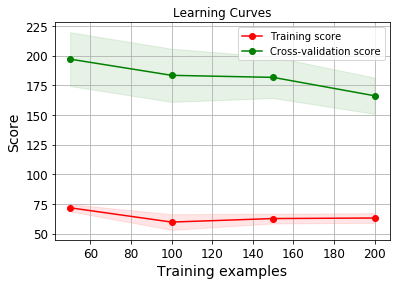

In [604]:
plt.figure()
plt.title('Learning Curves')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")


In [608]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=178,
                      n_jobs=None, oob_score=False, random_state=22, verbose=0,
                      warm_start=False)

In [616]:
winning_pipeline = Pipeline([('imputer',IterativeImputer(max_iter =10,random_state = 22,min_value =0)),
                               ('scaler',QuantileTransformer(output_distribution = 'normal',random_state =22))
                                ])

In [611]:
noninformative_attributes+['med_rental_rate','city','Latitude','Longitude','change_hunits']

['owned_homes',
 'med_hval_aspercentof_medearn',
 'med_hcost_own_wo_mortg',
 'threebed_750_999',
 'median_year_house_built',
 'household_size_for_renters',
 'studio_1500_more',
 'studio_1000_1499',
 'onebed_750_999',
 'housing_density',
 'population',
 'housing_units',
 'hcost_as_perc_of_hincome_womortg',
 'med_year_moved_in_for_owners',
 'med_own_cost_aspercentof_income',
 'family_members_per_hunit',
 'studio_750_999',
 'med_year_renter_moved_in',
 'area_total_km2',
 'household_size_of_howners',
 'hcost_aspercentof_hincome_ownmortg',
 'med_rental_rate',
 'city',
 'Latitude',
 'Longitude',
 'change_hunits']

In [621]:
winning_pipeline.fit(strat_train_set.drop(noninformative_attributes+['med_rental_rate','city','Latitude','Longitude','change_hunits'],axis=1))

C:\Users\Crist\Anaconda3\envs\projectone\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (358). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Pipeline(memory=None,
         steps=[('imputer',
                 IterativeImputer(add_indicator=False, estimator=None,
                                  imputation_order='ascending',
                                  initial_strategy='mean', max_iter=10,
                                  max_value=None, min_value=0,
                                  missing_values=nan, n_nearest_features=None,
                                  random_state=22, sample_posterior=False,
                                  tol=0.001, verbose=0)),
                ('scaler',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='normal',
                                     random_state=22, subsample=100000))],
         verbose=False)

In [622]:
from sklearn.metrics import mean_squared_error
final_model = rf_random.best_estimator_
X_test = strat_test_set.drop(noninformative_attributes+['med_rental_rate','city','Latitude','Longitude','change_hunits'],axis=1)
y_test = strat_test_set['med_rental_rate'].copy()

X_test_prepared = winning_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [623]:
final_rmse

117.04976011831762

Picking the Winning Model:
* Which model had the best performance on the test set? (performance)
<br><br>
* Does it perform well across various performance metrics? (robustness)
<br><br>
* Did it also have (one of) the best cross-validated scores from the training set? (consistency)
<br><br>
* Does it solve the original business problem? (win condition)

[Hands-On Machine Learning with Scikit-Learn & TensorFlow](http://shop.oreilly.com/product/0636920142874.do)
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#three
    https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf
https://elitedatascience.com/primer
https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

"Towncharts.com - United States Demographics Data." United States Demographics data. N.p., 15 Dec. 2016. Web. 04 Sep. 2019. <http://www.towncharts.com/>.